In [1]:
import matplotlib.pyplot as plt
import numpy as np

In [2]:
def split_to_bits(val):
    if val > 255 or val < 0:
        raise ValueError()
    
    res = [0, 0, 0, 0, 0, 0, 0, 0];
    
    bit_ix = 0
    while val > 0:
        bit_val = val % 2
        val = val // 2
        res[bit_ix]  = bit_val
        bit_ix += 1
        
    return res

In [4]:
def init_space(x):
    return np.zeros(x).astype(int)

In [5]:
def compute_next_cell_state(space, index, rule_bits):
    
    val_1: int = 0
    val_2: int = int(space[index])
    val_3: int = 0
    
    if index > 0:
        val_1 = int(space[index - 1])
        
    if index < len(space) - 1:
        val_3 = int(space[index + 1])
        
    val_2 = int(val_2 * 2)
    val_3 = int(val_3 * 4)
        
    bit_ix = val_1 | val_2 | val_3
    
    new_value = rule_bits[bit_ix]
    
    return new_value

In [6]:
def compute_next_generation(space, rule_bits):
    space_len = len(space)
    next_gen_space = init_space(space_len)
    for ix in range(0, space_len):
        new_value = compute_next_cell_state(space, ix, rule_bits)
        next_gen_space[ix] = new_value
        
    return next_gen_space
        

In [14]:
def generate_image_for_rule(rule):
    
    rule_bits = split_to_bits(rule)
    
    space = init_space(1000)
    space[500] = 1
    
    gens = []
    gens.append(space)

    for gen in range(0, 1000):
        new_gen = compute_next_generation(space, rule_bits)
        space = new_gen
        gens.append(space)
        
    gens_np = np.array(gens) * 255
    
    #plt.imshow(gens_np, cmap='gray', interpolation='nearest')
    #plt.colorbar()  # Add a colorbar for reference
    #plt.show()
    
    fig, ax = plt.subplots(figsize=(18, 18))
    ax.imshow(gens_np, cmap='gray', interpolation='nearest')

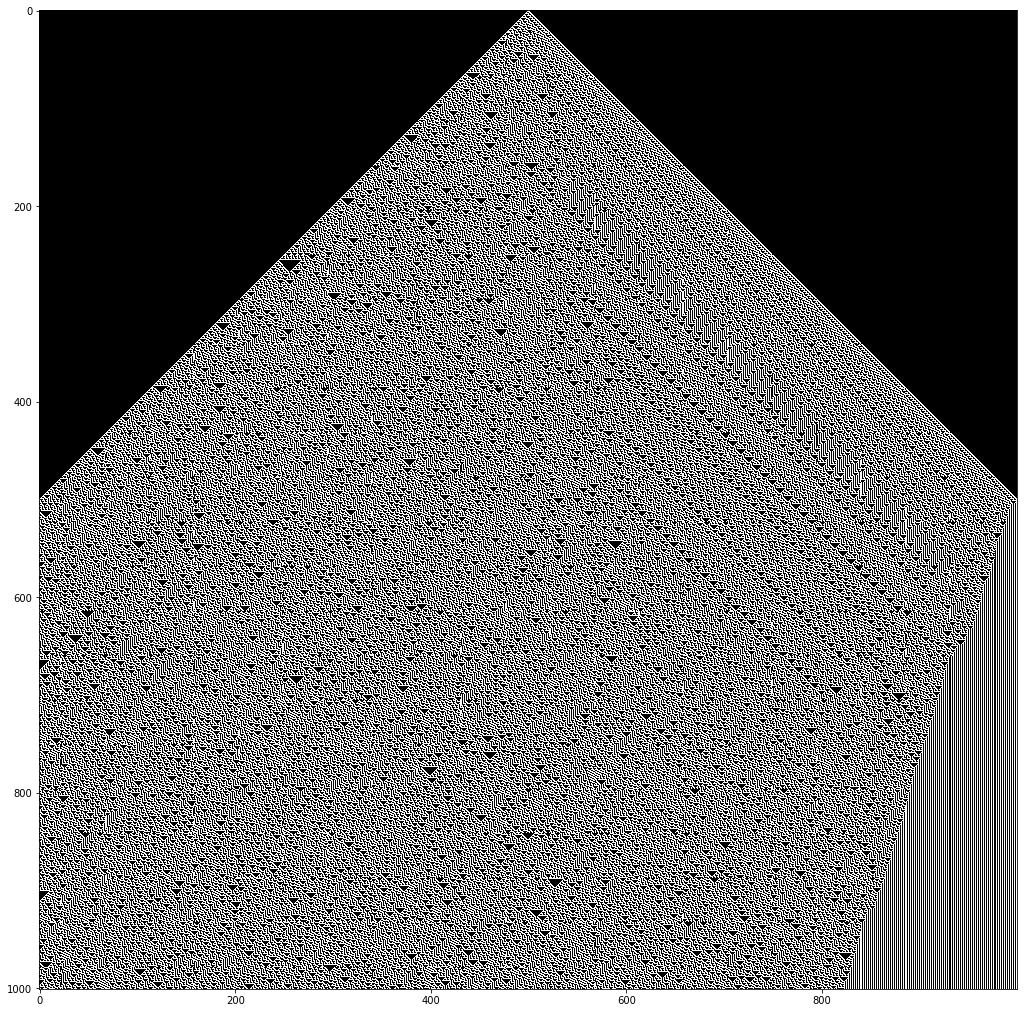

In [15]:
generate_image_for_rule(30)

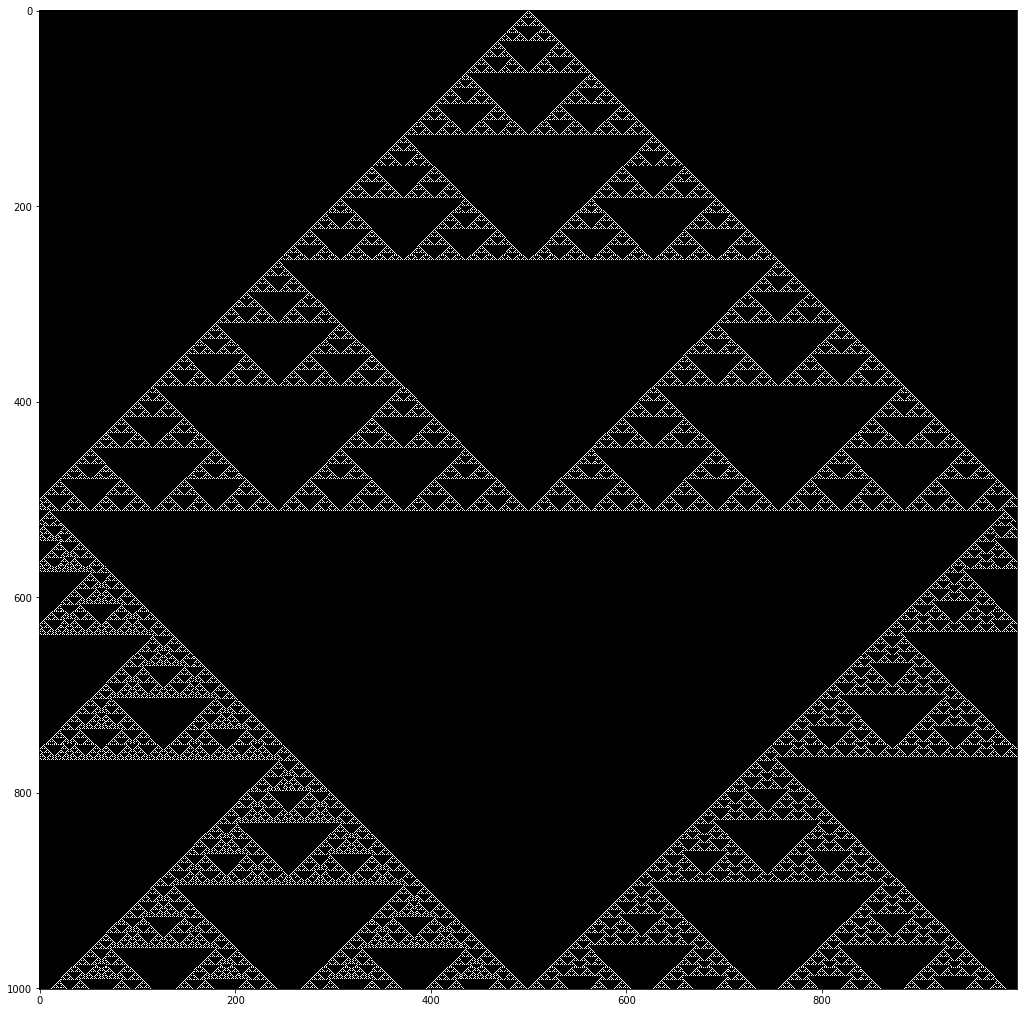

In [19]:
generate_image_for_rule(18)